In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from evaluate import denoise
from utils.loaddataset import SoundfieldDatasetLoader
from utils.modelhandler import loadtrainedmodel
from utils.util import load_config_yaml

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
# Load config file
config_file_path = "config.yml"
yaml_contents = load_config_yaml(config_file_path)
config = yaml_contents["eval"]

# Load dataset
loader = SoundfieldDatasetLoader(config["dataset"])
dataset = loader.load()
im_noise, im_true = dataset[:]

Text(0.5, 1.0, 'Denoised')

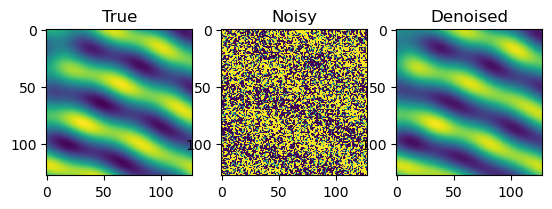

In [8]:
# Choose one data randomly
idx = np.random.randint(0, im_noise.shape[0])
im_n = im_noise[idx,...].unsqueeze(0)
im_t = im_true[idx,...].unsqueeze(0)

# Denoising by DNN
net = loadtrainedmodel(config["network"]["model"], config["network"]["weights_file"]).to(device)
im_d = net(im_n.to(device)).cpu()

# Torch to numpy
im_t = torch.squeeze(im_t).detach().numpy()
im_n = torch.squeeze(im_n).detach().numpy()
im_d = torch.squeeze(im_d).detach().numpy()

# Show images (real parts)
fig, axs = plt.subplots(1,3)
axs[0].imshow(im_t[0,...], vmin=-1, vmax=1)
axs[0].set_title("True")
axs[1].imshow(im_n[0,...], vmin=-1, vmax=1)
axs[1].set_title("Noisy")
axs[2].imshow(im_d[0,...], vmin=-1, vmax=1)
axs[2].set_title("Denoised")
